<h2><center>Лабораторна робота 1: Попередня обробка даних. Описові статистики. Розвідувальний аналіз.</h2>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statistics as st
import matplotlib.pyplot as plt
import random
import pylab
import scipy.stats
import probscale

1.Завантажити датасет з кількісними даними.

In [2]:
data = pd.read_csv("avocado1.csv")
data.head(10)

,Date,AveragePrice,Total Volume,year,region
0,2017-09-10,1.42,286146.89,2017,SouthCarolina
1,2015-04-12,2.05,3217.19,2015,StLouis
2,2016-12-04,0.69,1245471.58,2016,DallasFtWorth
3,2015-09-20,1.56,3291.61,2015,BuffaloRochester
4,2015-10-11,1.90,1170.01,2015,Albany
5,2018-03-04,1.17,432095.58,2018,HartfordSpringfield
6,2018-03-11,1.16,185174.55,2018,BuffaloRochester
7,2017-12-03,1.01,2615853.00,2017,LosAngeles
8,2015-05-03,2.14,18576.24,2015,NewYork
9,2017-03-05,1.19,273485.30,2017,HarrisburgScranton


2.Підрахувати показники центру: середні значення, медіану.

In [3]:
mean = round(st.mean(data['AveragePrice']), 3)
print("Середнє арифметичне: ", mean)

Середнє арифметичне:  1.376


In [32]:
g_mean = round(st.geometric_mean(data['AveragePrice']), 3)
print("Середнє геометричне: ", g_mean)

Середнє геометричне:  1.324


In [5]:
h_mean = round(st.harmonic_mean(data['AveragePrice']), 3)
print("Середнє гармонійне: ", h_mean)

Середнє гармонійне:  1.27


In [6]:
median = round(np.median(data['AveragePrice']), 3)
print("Медіана:", median)

Медіана: 1.345


3.Підрахувати показники варіації: дисперсію, стандартне відхилення та коефіцієнт варіації, розмах варіації та інтерквартильний розмах.

In [7]:
variance = round(st.variance(data['AveragePrice']), 3)
print("Дисперсія: ",variance)

Дисперсія:  0.139


In [8]:
stdev = round(st.stdev(data['AveragePrice']), 3)
print("Стандартне відхилення", stdev)

Стандартне відхилення 0.373


In [9]:
variation_coefficient = round(stdev/mean, 3)
print("Коефіцієнт варіації: ",variation_coefficient)

Коефіцієнт варіації:  0.271


In [10]:
scope = round(max(data['AveragePrice']) - min(data['AveragePrice']), 3)
print("Розмах варіції: ", scope)

Розмах варіції:  1.92


In [11]:
IQ = round(np.percentile(data['AveragePrice'], 75) - np.percentile(data['AveragePrice'], 25), 3)
print("Міжквартильний розмах: ", IQ)

Міжквартильний розмах:  0.582


4.Побудувати ящик з вусами (з підписами).

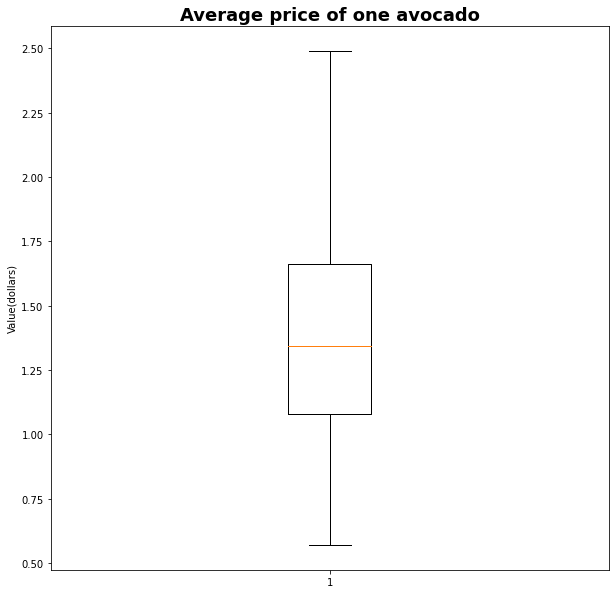

In [12]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot()
ax.boxplot(data['AveragePrice'])
ax.set_title('Average price of one avocado', fontsize=18, fontweight='bold')
ax.set_ylabel('Value(dollars)')
plt.show()

5.Вивести п’ятиточкову характеристику (екстремальні точки та квартилі).

In [13]:
data['AveragePrice'].describe()

count    300.000000
mean       1.375567
std        0.373247
min        0.570000
25%        1.080000
50%        1.345000
75%        1.662500
max        2.490000
Name: AveragePrice, dtype: float64

6.Знайти 1-й та 9-й децилі.

In [14]:
print("1 дециль: ", round(np.percentile(data['AveragePrice'], 10), 3))

1 дециль:  0.929


In [15]:
print("9 дециль: ", round(np.percentile(data['AveragePrice'], 90), 3))

9 дециль:  1.88


7.Підрахувати коефіцієнт асиметрії та коефіцієнт ексцесу.

In [16]:
skewness = round(scipy.stats.skew(data['AveragePrice']), 3)
print("Коефіцієнт асиметрії: " , skewness)

Коефіцієнт асиметрії:  0.225


In [17]:
kurtosis = round(scipy.stats.kurtosis(data['AveragePrice']), 3)
print("Коефіцієнт ексцесу: " , kurtosis)

Коефіцієнт ексцесу:  -0.633


8.Побудувати гістограму, використовуючи різні методи групування (базове правило, правило Скотта, правило Фрідмана-Діаконіса). На тому ж графіку зобразити оцінку щільності та графік щільності гіпотетичного розподілу.

In [35]:
#Fitting parameters
data1 = data['AveragePrice'].to_numpy()
mu = mean
std = stdev
print("mu = ", mu)
print("std =", std)

mu =  1.376
std = 0.373


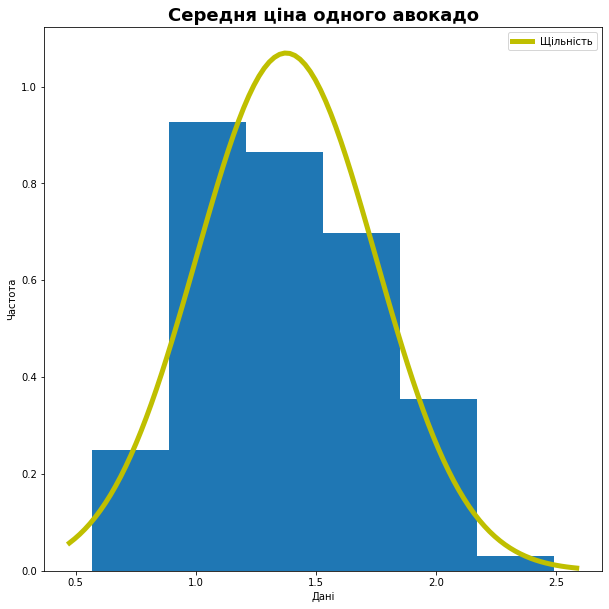

In [36]:
#Sturgess formula
sturgess_n = 1 + int(np.log(len(data['AveragePrice'])))
plt.figure(figsize=(10,10))
#Plot hist
plt.hist(data['AveragePrice'], density=True, bins=sturgess_n)
plt.title("Середня ціна одного авокадо", fontsize=18, fontweight='bold')
plt.ylabel('Частота')
plt.xlabel('Дані')
#PLot pdf
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = scipy.stats.norm.pdf(x, mu, std)
plt.plot(x, p, 'y', linewidth=5)
plt.legend(["Щільність"])
plt.show()

Формула Скотта
Ширина кроку:  0.19501579655434595
Кількість розбиттів:  9


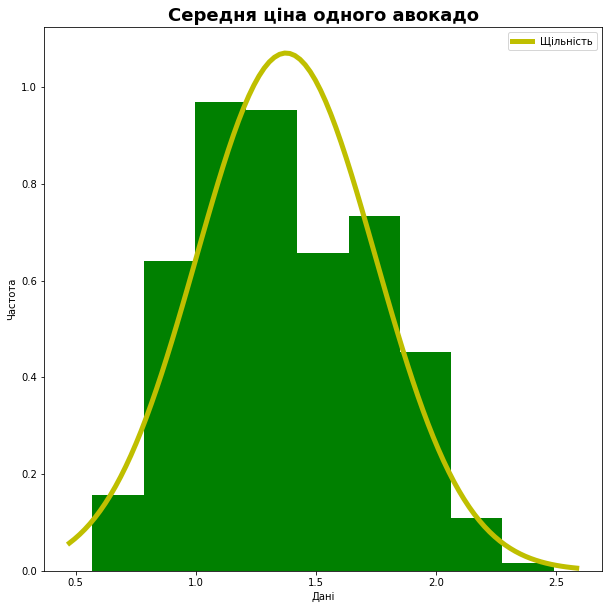

In [20]:
print("Формула Скотта")
h = 3.5 * stdev * len(data['AveragePrice'])**(-1/3)
print("Ширина кроку: ", h)
n = int(scope / h)
print("Кількість розбиттів: ",n)
plt.figure(figsize=(10,10))
#Plot hist
plt.hist(data['AveragePrice'], density=True, bins=n, facecolor = 'g')
plt.title("Середня ціна одного авокадо",fontsize=18, fontweight='bold')
plt.ylabel('Частота')
plt.xlabel('Дані')
#Plot pdf
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = scipy.stats.norm.pdf(x, mu, std)
plt.plot(x, p, 'y', linewidth=5)
plt.legend(["Щільність"])
plt.show()

Формула Фрідмана-Діаконіса: 
Ширина кроку:  0.173878504166418
Кількість розбиттів:  11


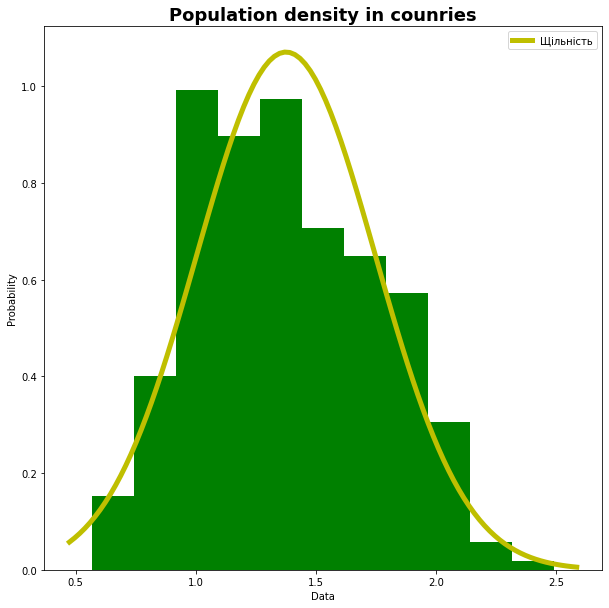

In [21]:
print("Формула Фрідмана-Діаконіса: ")
h = 2 * IQ * len(data['AveragePrice']) **(-1/3)
n = int(scope / h)
print("Ширина кроку: ", h)
n = int(scope / h)
print("Кількість розбиттів: ",n)
#Plot hist
plt.figure(figsize=(10,10))
plt.hist(data['AveragePrice'], density=True, bins=n, facecolor = 'g')
plt.title("Population density in counries",fontsize=18, fontweight='bold')
plt.ylabel('Probability')
plt.xlabel('Data')
#Plot pdf
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = scipy.stats.norm.pdf(x, mu, std)
plt.plot(x, p, 'y', linewidth=5)
plt.legend(["Щільність"])
plt.show()

9.Зобразити Q-Q-діаграму для перевірки узгодженості з відповідним розподілом.

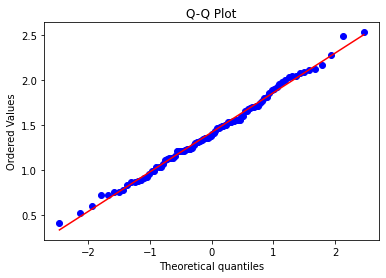

In [25]:
measurements = np.random.normal(loc=mu, scale=std, size=100)   
scipy.stats.probplot(measurements, dist="norm", plot=pylab)
pylab.title("Q-Q Plot")
pylab.show()

10.Зобразити P-P-діаграму для перевірки узгодженості з відповідним розподілом.

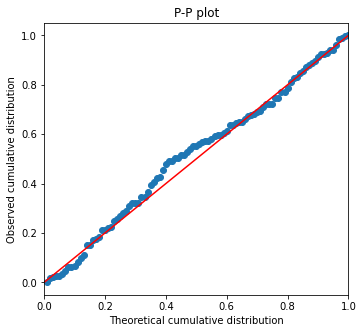

In [31]:
norm = scipy.stats.norm.rvs(loc=mu, scale=std ,size = len(data1))
norm.sort()
fig = plt.figure(figsize=(12,5)) 
ax2 = fig.add_subplot(122)

bins = np.percentile(norm, range(0,101))
data_counts, bins = np.histogram(data1, bins)
norm_counts, bins = np.histogram(norm, bins)
cum_data = np.cumsum(data_counts)
cum_norm = np.cumsum(norm_counts)
cum_data = cum_data / max(cum_data)
cum_norm = cum_norm / max(cum_norm)
    
ax2.plot(cum_norm,cum_data,"o")
min_value = np.floor(min(min(cum_norm),min(cum_data)))
max_value = np.ceil(max(max(cum_norm),max(cum_data)))
ax2.plot([min_value,max_value],[min_value,max_value],'r')
ax2.set_xlim(min_value,max_value)
ax2.set_xlabel('Theoretical cumulative distribution')
ax2.set_ylabel('Observed cumulative distribution')
title = 'P-P plot'
ax2.set_title(title)
plt.show()

11.За допомогою одного з статистичних критеріїв перевірити згоду з відповідним розподілом.

In [24]:
kolmogorov_smirnov = scipy.stats.kstest(data1, 'norm', args=(mu, std))
print("P-значення: ", kolmogorov_smirnov.pvalue)

P-значення:  0.14803360610650662


Так як нульова гіпотеза тесту ствержує те, что данні розподілені нормально, при значенні Р меншому за 0.05(обраний альфа для цієї задачі), гіпотеза відхиляється. В нашому випадку значення р=0.148, отже, можна зробити висновок, що данні розподілені нормально.